In [1]:
import datetime
import warnings
warnings.filterwarnings('ignore')

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # 用于可视化缺失值分布
import scipy.stats as st

#调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在python console里面生成图像
%matplotlib inline

In [2]:
# 数据加载
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/testA.csv')

In [3]:
#通过nrows参数，来设置读取文件的前多少行，nrows是一个大于等于0的整数。 
data_train_sample = pd.read_csv('data/train.csv',nrows=5)

## 1 数据总览

### 简略观察 head() tail()

In [4]:
data_train.head().append(data_train.tail())

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
799995,799995,25000.0,3,14.49,860.41,C,C4,2659.0,7 years,1,...,6.0,2.0,12.0,13.0,10.0,14.0,0.0,0.0,0.0,3.0
799996,799996,17000.0,3,7.90,531.94,A,A4,29205.0,10+ years,0,...,15.0,16.0,2.0,19.0,2.0,7.0,0.0,0.0,0.0,0.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


### 数据类型 info()

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

### 相关统计 describe() shape()

In [6]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [7]:
data_train.shape

(800000, 47)

# 2 缺失值分析

### 查看每列存在nan的情况

In [8]:
#可以直观看到空值个数多少
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

In [9]:
def find_loss_features(data):
    return [col for col in data.columns if data[col].isnull().any()]

train_loss_features = find_loss_features(data_train)
print(train_loss_features)

['employmentTitle', 'employmentLength', 'postCode', 'dti', 'pubRecBankruptcies', 'revolUtil', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']


### 特征值nan可视化

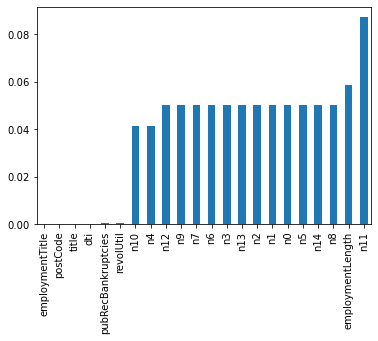

In [10]:
missing = data_train.isnull().sum()/len(data_train) 
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

可以发现匿名特征列中有很多特征都存在空值

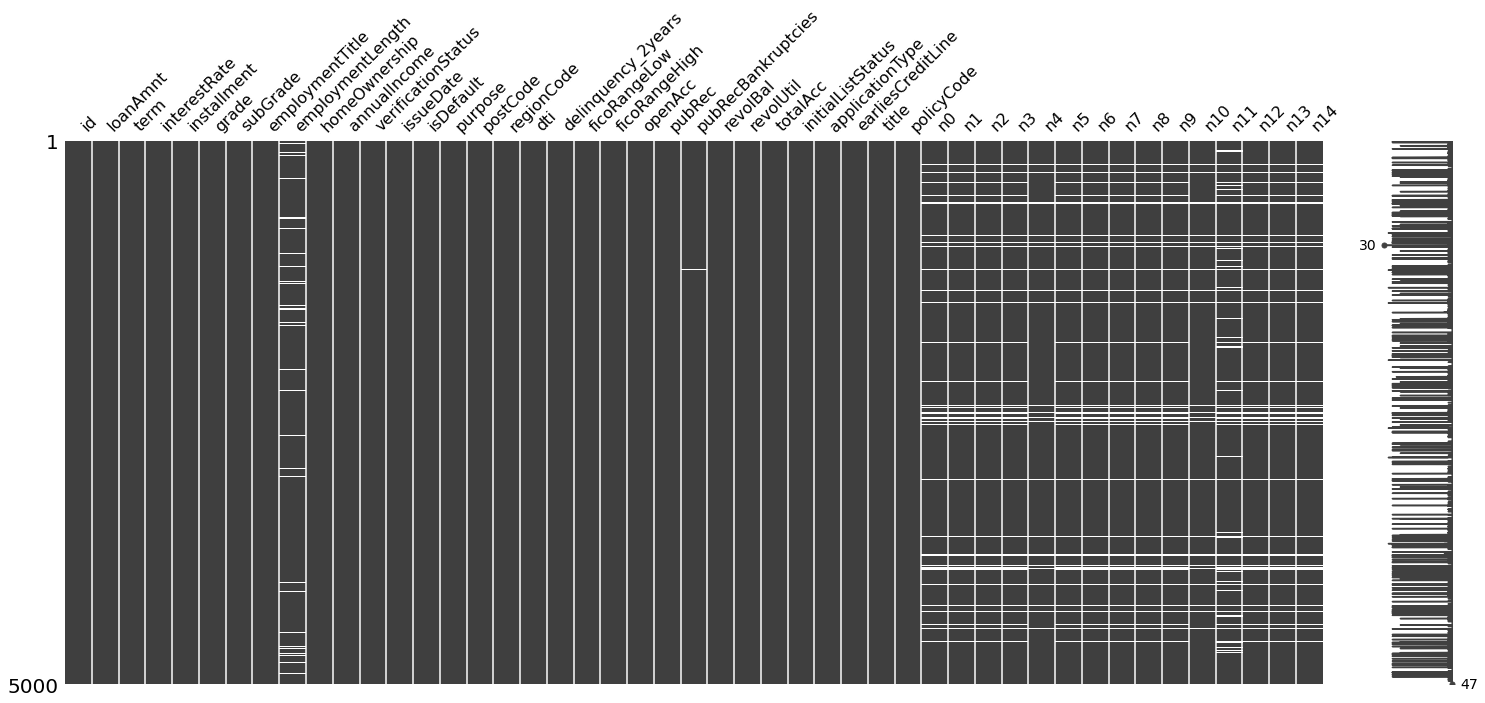

In [11]:
msno.matrix(data_train.sample(5000))

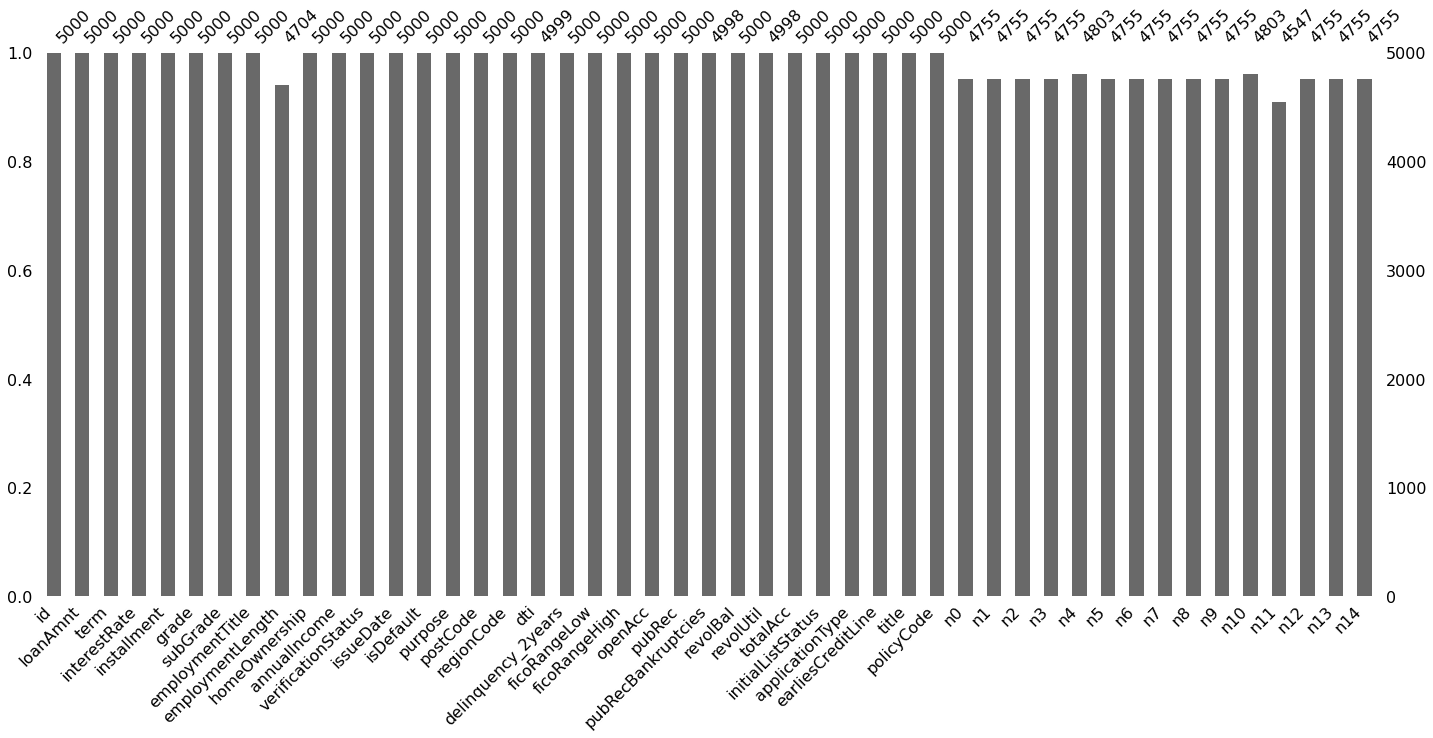

In [12]:
msno.bar(data_train.sample(5000))

# 缺失值处理

+ 缺失值过多，可以删除该列；数据集较多，有很少的缺失值，可以删除掉缺失值的行
+ 不处理，有些模型（如xgboost）有处理缺失值机制
+ 如果属性对学习不是特别重要，可以进行插值补全（均值，中位数，众数，建模预测，多重插补等）

In [13]:
# data_train.fillna(data_train.mean(),inplace=True) # 填充均值
# data_train.fillna(data_train.median(),inplace=True) # 填充中位数
# data_train.fillna(data_train.mode(),inplace=True) # 填充众数

# 唯一值处理

In [14]:
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]
print(one_value_fea)

['policyCode']


特征值是唯一值的，对结果预测结果影响不大，可以考虑删除

# 3 异常值分析

### 均方差

如果一个数据分布近似正态，那么大约 68% 的数据值会在均值的一个标准差范围内，大约 95% 会在 两个标准差范围内，大约 99.7% 会在三个标准差范围内。

In [1]:
def find_outliers_by_3segama(data,fea):    
    data_std = np.std(data[fea])    
    data_mean = np.mean(data[fea])   
    outliers_cut_off = data_std * 3    
    lower_rule = data_mean - outliers_cut_off    
    upper_rule = data_mean + outliers_cut_off    
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')    
    return data

### 箱线图

# 4 特征数值分析

+ 特征值一般由数值特征和类型特征组成
+ 数值特征又分为离散和连续类型
+ 对于数字类型是连续型的我们一般做数据分箱操作，从模型效果来看，降低了变量的复杂性，减少变量噪音对模型的影响，使模型更加稳定

In [15]:
#选取数字类型特征
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))

In [16]:
#过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    """返回连续型特征，离散型特征"""
    numerical_serial_fea = []    
    numerical_noserial_fea = []    
    for fea in feas:        
        temp = data[fea].nunique()        
        if temp <= 10:            
            numerical_noserial_fea.append(fea)            
            continue        
        numerical_serial_fea.append(fea)    
    return numerical_serial_fea,numerical_noserial_fea 
        
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [17]:
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [18]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

### 查看离散型数值特征的分布情况

In [19]:
data_train['term'].value_counts()

3    606902
5    193098
Name: term, dtype: int64

In [20]:
data_train['homeOwnership'].value_counts()

0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64

In [21]:
data_train['verificationStatus'].value_counts()

1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64

In [22]:
data_train['isDefault'].value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

In [23]:
data_train['initialListStatus'].value_counts()

0    466438
1    333562
Name: initialListStatus, dtype: int64

In [24]:
data_train['applicationType'].value_counts()

0    784586
1     15414
Name: applicationType, dtype: int64

In [25]:
data_train['policyCode'].value_counts()

1.0    800000
Name: policyCode, dtype: int64

In [26]:
data_train['n11'].value_counts()

0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64

In [27]:
data_train['n12'].value_counts()

0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64

连续型变量我们用图形化分析比较直观方便

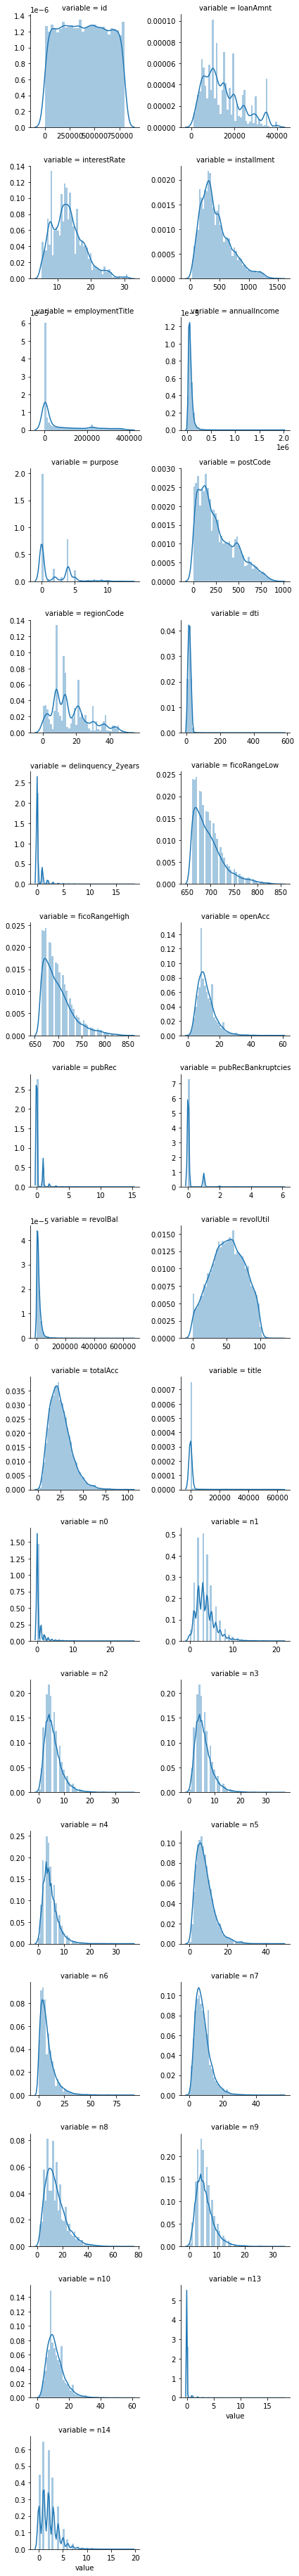

In [28]:
f = pd.melt(data_train.sample(20000), value_vars=numerical_serial_fea) #训练集数据太大，这里抽样选取20000
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False) 
g = g.map(sns.distplot, "value")

通过

### 非数值型特征分析

In [29]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [30]:
data_train['grade'].value_counts()

B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64

In [31]:
data_train["subGrade"].value_counts()

C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64

In [32]:
data_train["employmentLength"].value_counts()

10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

In [33]:
data_train["issueDate"].value_counts()

2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01       23
2007-07-01       21
2008-09-01       19
2007-09-01        7
2007-06-01        1
Name: issueDate, Length: 139, dtype: int64

In [34]:
data_train["earliesCreditLine"].value_counts()

Aug-2001    5567
Aug-2002    5403
Sep-2003    5403
Oct-2001    5258
Aug-2000    5246
            ... 
May-1957       1
Mar-1958       1
Oct-1954       1
Dec-1960       1
Mar-1962       1
Name: earliesCreditLine, Length: 720, dtype: int64

# 4 可视化分析

Text(0, 0.5, 'Probability')

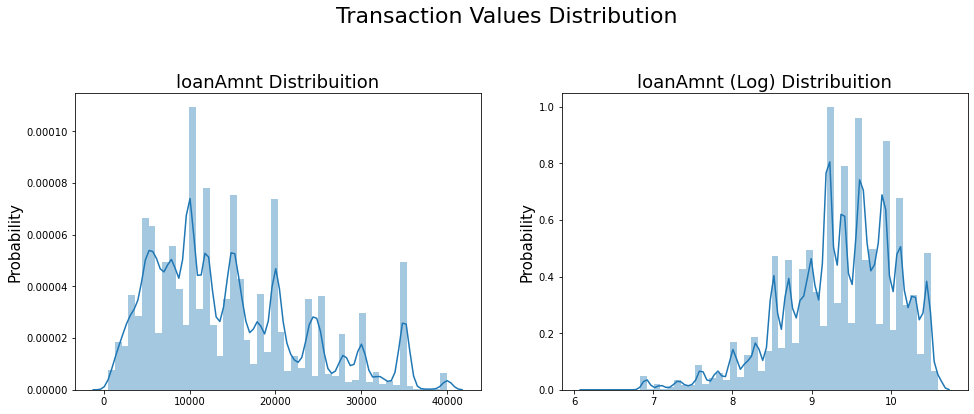

In [35]:
plt.figure(figsize=(16,12)) 
plt.suptitle('Transaction Values Distribution', fontsize=22) 
plt.subplot(221) 
sub_plot_1 = sns.distplot(data_train['loanAmnt']) 
sub_plot_1.set_title("loanAmnt Distribuition", fontsize=18) 
sub_plot_1.set_xlabel("") 
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222) 
sub_plot_2 = sns.distplot(np.log(data_train['loanAmnt'])) 
sub_plot_2.set_title("loanAmnt (Log) Distribuition", fontsize=18) 
sub_plot_2.set_xlabel("") 
sub_plot_2.set_ylabel("Probability", fontsize=15)

### 单一变量分布可视化(离散型)

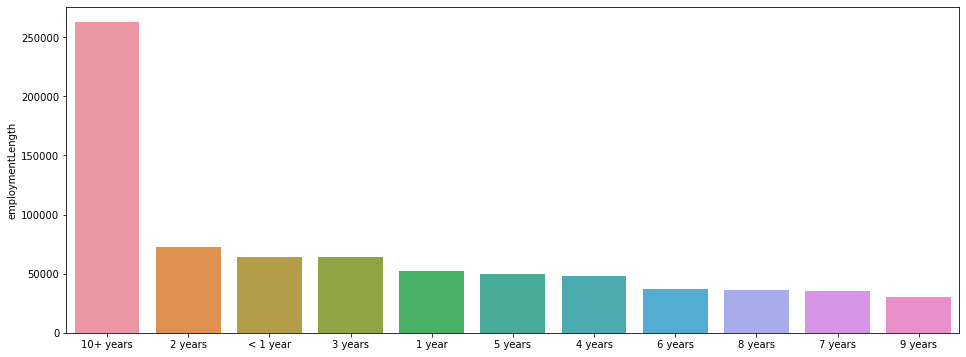

In [36]:
plt.figure(figsize=(16, 6))
sns.barplot(data_train["employmentLength"].value_counts(dropna=False).keys()[:20],data_train["employmentLength"].value_counts(dropna=False)[:20]) 
plt.show()

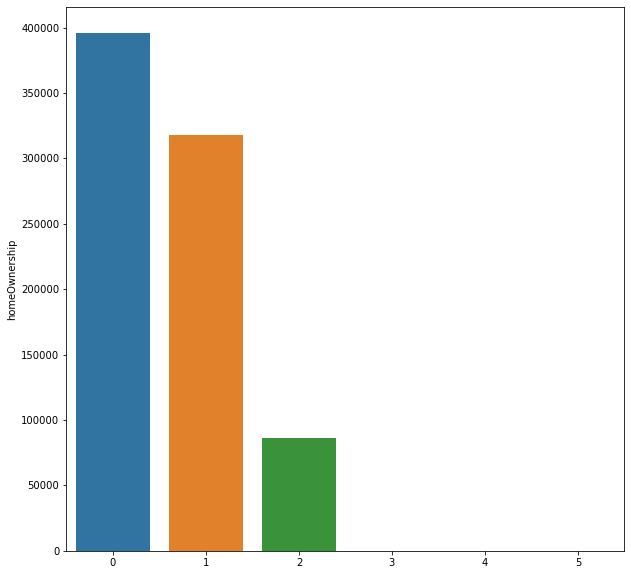

In [37]:
#homeOwnership

plt.figure(figsize=(10, 10))
sns.barplot(data_train["homeOwnership"].value_counts(dropna=False).keys()[:20],data_train["homeOwnership"].value_counts(dropna=False)[:20]) 
plt.show()

In [38]:
train_loan_fr = data_train.loc[data_train['isDefault'] == 1] 
train_loan_nofr = data_train.loc[data_train['isDefault'] == 0]

train_loan_fr.groupby('grade')['grade'].count()

grade
A     8432
B    31079
C    51106
D    36296
E    21390
F     8641
G     2666
Name: grade, dtype: int64

In [39]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(data_train.sample(20000)) 
pfr.to_file("./example.html")